In [2]:
import pandas as pd

In [20]:
books = pd.read_csv('clean_books.csv')
ratings = pd.read_csv('clean_ratings.csv')
users = pd.read_csv('clean_users.csv')

In [21]:
books

,isbn,title,author,year,publisher,image_s,image_m,image_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [22]:
# Проверить отсутствующие ISBN
missing_books = ratings[~ratings['isbn'].isin(books['isbn'])]
print("Отсутствующие книги в БД:")
print(missing_books['isbn'].unique())

# Проверить отсутствующих пользователей
missing_users = ratings[~ratings['user_id'].isin(users['user_id'])]
print("Отсутствующие пользователи в БД:")
print(missing_users['user_id'].unique())

Отсутствующие книги в БД:
['3257224281' '0600570967' '342310538' ... '55305663' '8804413530'
 '05162443314']
Отсутствующие пользователи в БД:
[]


In [23]:
len(missing_books['isbn'].unique())

36131

In [24]:
len(ratings)

433671

In [25]:
433671-36131

397540

In [30]:
ratings

,user_id,isbn,rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
3,276736,3257224281,8
4,276737,0600570967,6
...,...,...,...
433666,276704,0806917695,5
433667,276704,1563526298,9
433668,276709,0515107662,10
433669,276721,0590442449,10


In [26]:
# Оставляем только те оценки, где книги существуют
valid_ratings = ratings[ratings['isbn'].isin(books['isbn'])]


In [27]:
valid_ratings

,user_id,isbn,rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
5,276744,038550120X,7
7,276747,0060517794,9
...,...,...,...
433665,276704,0743211383,7
433666,276704,0806917695,5
433667,276704,1563526298,9
433668,276709,0515107662,10


In [28]:
m = valid_ratings[~ratings['isbn'].isin(books['isbn'])]
print("Отсутствующие книги в БД:")
print(m['isbn'].unique())


Отсутствующие книги в БД:
[]


C:\Users\arsen\AppData\Local\Temp\ipykernel_12004\3334621220.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m = valid_ratings[~ratings['isbn'].isin(books['isbn'])]


In [16]:
# Удаляем оценки с пустыми или некорректными ISBN
ratings = ratings[ratings['isbn'].str.len() == 10]  # ISBN-10 содержит 10 символов
# ИЛИ
ratings = ratings[ratings['isbn'].str.match(r'^\d{9}[\dX]$')]  # Проверка формата ISBN-10

In [17]:
ratings

,user_id,isbn,rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
3,276736,3257224281,8
4,276737,0600570967,6
...,...,...,...
433665,276704,0743211383,7
433666,276704,0806917695,5
433667,276704,1563526298,9
433668,276709,0515107662,10


In [29]:
m

,user_id,isbn,rating


In [31]:
import matplotlib.pyplot as plt

Ratings: (433671, 3)
Books: (271379, 8)
Users: (278858, 3)


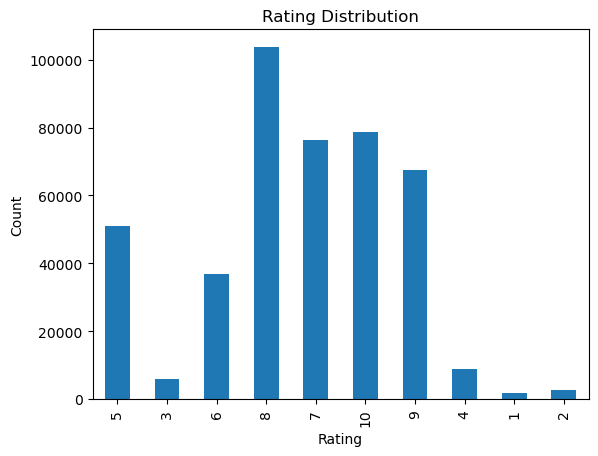

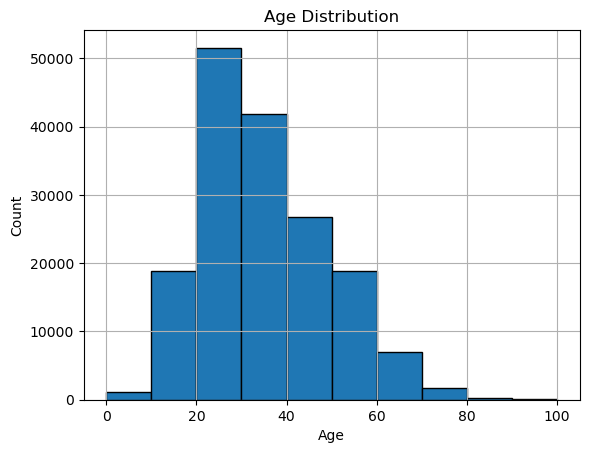

In [35]:
# Display basic info about datasets
print(f"Ratings: {ratings.shape}")
print(f"Books: {books.shape}")
print(f"Users: {users.shape}")

# Plot rating distribution
ratings.rating.value_counts(sort=False).plot(kind='bar', title='Rating Distribution', xlabel='Rating', ylabel='Count')
plt.show()

# Plot age distribution
users.age.hist(bins=range(0, 101, 10), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [34]:
users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import save_npz, load_npz
import os
import numpy as np

class ContentRecommender:
    def __init__(self, books_path='clean_books.csv', cache_dir='cache'):
        self.books = pd.read_csv(books_path)
        self.cache_dir = cache_dir
        os.makedirs(cache_dir, exist_ok=True)
        self._prepare()

    def _prepare(self):
        # Проверяем наличие кэшированных матриц
        tfidf_path = os.path.join(self.cache_dir, 'tfidf_matrix.npz')
        sim_path = os.path.join(self.cache_dir, 'similarity_matrix.npz')
        
        if os.path.exists(tfidf_path) and os.path.exists(sim_path):
            print("Загружаем матрицы из кэша...")
            self.tfidf_matrix = load_npz(tfidf_path)
            self.similarity_matrix = load_npz(sim_path)
        else:
            print("Вычисляем матрицы...")
            self.books['title'] = self.books['title'].fillna('')
            
            # Оптимизированный TF-IDF с ограничением признаков
            self.vectorizer = TfidfVectorizer(
                stop_words='english',
                max_features=20000,  # Уменьшаем количество признаков
                ngram_range=(1, 2)   # Учитываем словосочетания
            )
            
            self.tfidf_matrix = self.vectorizer.fit_transform(self.books['title'])
            
            # Вычисляем схожесть по частям (чтобы избежать переполнения памяти)
            chunk_size = 1000
            n_books = len(self.books)
            self.similarity_matrix = np.zeros((n_books, n_books))
            
            for i in range(0, n_books, chunk_size):
                for j in range(0, n_books, chunk_size):
                    chunk_sim = cosine_similarity(
                        self.tfidf_matrix[i:i+chunk_size],
                        self.tfidf_matrix[j:j+chunk_size]
                    )
                    self.similarity_matrix[i:i+chunk_size, j:j+chunk_size] = chunk_sim
            
            # Сохраняем в кэш
            save_npz(tfidf_path, self.tfidf_matrix)
            save_npz(sim_path, self.similarity_matrix)

    def get_recommendations(self, book_title, top_n=10):
        indices = pd.Series(self.books.index, index=self.books['title']).drop_duplicates()
        
        if book_title not in indices:
            similar_titles = self.books[
                self.books['title'].str.contains(book_title, case=False)
            ]['title'].head(5).tolist()
            return {
                'error': f"Книга '{book_title}' не найдена.",
                'suggestions': similar_titles
            }
        
        idx = indices[book_title]
        sim_scores = list(enumerate(self.similarity_matrix[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        
        book_indices = [i[0] for i in sim_scores]
        return self.books.iloc[book_indices][['title', 'author', 'year']]

if __name__ == '__main__':
    try:
        recommender = ContentRecommender()
        
        # Тестируем на нескольких книгах
        test_books = [
            "Harry Potter and the Sorcerer's Stone",
            "The Hobbit",
            "To Kill a Mockingbird"
        ]
        
        for book in test_books:
            print(f"\nРекомендации для '{book}':")
            result = recommender.get_recommendations(book)
            
            if isinstance(result, dict) and 'error' in result:
                print(result['error'])
                print("Возможно вы имели в виду:", ", ".join(result['suggestions']))
            else:
                print(result)
                
    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")
        print("Рекомендации:")
        print("1. Убедитесь, что файл clean_books.csv существует")
        print("2. Проверьте доступную память (нужно минимум 8GB RAM)")
        print("3. Попробуйте уменьшить размер датасета")

Вычисляем матрицы...
Произошла ошибка: Unable to allocate 549. GiB for an array with shape (271379, 271379) and data type float64
Рекомендации:
1. Убедитесь, что файл clean_books.csv существует
2. Проверьте доступную память (нужно минимум 8GB RAM)
3. Попробуйте уменьшить размер датасета
